In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
from torch.utils.data import random_split
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

In [85]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [195]:
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.RandomAffine(degrees=10, translate=(0.1, 0.1)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

In [184]:
dataset = MNIST(root='./data', train=True, download=True, transform=transform)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size

train_set, test_set = random_split(dataset, [train_size, test_size])

train_loader = DataLoader(dataset=train_set, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_set, batch_size=64, shuffle=False)

In [185]:
smaple_data = MNIST(root='./data')
def show_images(images, labels):
    images = images.numpy()
    fig, axes = plt.subplots(1, len(images), figsize=(12, 4))
    for ax, img, label in zip(axes, images, labels):
        ax.imshow(img[0], cmap='gray')
        ax.set_title(f'Label: {label}')
        ax.axis('off')
    plt.show()

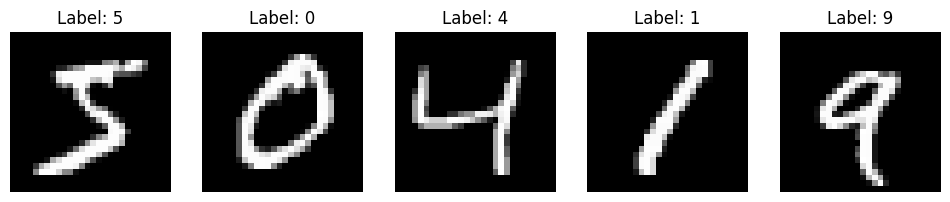

In [118]:
show_images(smaple_data.data[:5].unsqueeze(1), smaple_data.targets[:5])

In [186]:
dataset[0][0].shape

torch.Size([1, 28, 28])

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)

        self.fc1 = nn.Linear(128*3*3, 512)
        self.fc2 = nn.Linear(512, 10)
    
    def forward(self, input):
        conv1 = self.pool(torch.relu(self.conv1(input)))
        conv2 = self.pool(torch.relu(self.conv2(conv1)))
        conv3 = self.pool(torch.relu(self.conv3(conv2)))
        
        flatten = conv3.view(conv2.size(0), -1)

        fc1 = torch.relu(self.fc1(flatten))
        output = self.fc2(fc1)
        return output

In [188]:
model = CNN().to(device)

In [189]:
model

CNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1152, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=10, bias=True)
)

In [190]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [193]:
epochs = 10
for epoch in range(epochs):
    running_loss = 0.0
    correct = 0
    total = 0

    for i, (inputs, labels) in enumerate(train_loader):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
        if (i + 1) % 100 == 0: 
            print(f"Epoch [{epoch+1}/{epochs}], Step [{i+1}/{len(dataloader)}], "
                f"Loss: {running_loss/100:.4f}, Accuracy: {100 * correct/total:.2f}%")
            running_loss = 0.0

Epoch [1/10], Step [100/938], Loss: 0.0660, Accuracy: 97.84%
Epoch [1/10], Step [200/938], Loss: 0.0706, Accuracy: 97.86%
Epoch [1/10], Step [300/938], Loss: 0.0641, Accuracy: 97.86%
Epoch [1/10], Step [400/938], Loss: 0.0683, Accuracy: 97.82%
Epoch [1/10], Step [500/938], Loss: 0.0714, Accuracy: 97.81%
Epoch [1/10], Step [600/938], Loss: 0.0715, Accuracy: 97.78%
Epoch [1/10], Step [700/938], Loss: 0.0667, Accuracy: 97.79%
Epoch [2/10], Step [100/938], Loss: 0.0638, Accuracy: 97.91%
Epoch [2/10], Step [200/938], Loss: 0.0647, Accuracy: 97.94%
Epoch [2/10], Step [300/938], Loss: 0.0630, Accuracy: 97.99%
Epoch [2/10], Step [400/938], Loss: 0.0652, Accuracy: 97.92%
Epoch [2/10], Step [500/938], Loss: 0.0620, Accuracy: 97.90%
Epoch [2/10], Step [600/938], Loss: 0.0711, Accuracy: 97.90%
Epoch [2/10], Step [700/938], Loss: 0.0615, Accuracy: 97.92%
Epoch [3/10], Step [100/938], Loss: 0.0609, Accuracy: 98.25%
Epoch [3/10], Step [200/938], Loss: 0.0613, Accuracy: 98.16%
Epoch [3/10], Step [300/

In [194]:
model.eval()
test_loss = 0.0
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        test_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

avg_loss = test_loss / len(test_dataloader)
accuracy = 100 * correct / total
print(f"Test Loss: {avg_loss:.4f}, Test Accuracy: {accuracy:.2f}%")

Test Loss: 0.0824, Test Accuracy: 97.91%
